## Dataset information:

### Data source: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection/data

Description: the data contains .png images in a folder called 'images' and .xml files in a folder called 'annotations.'
For every image there is a corresponding XML file. Every XML file has information on the people detected in each image, such
as if they are wearing a mask or not as well as the xmin, ymin, xmax, ymax coordinates, which are the coordinates to the rectangular shape around their face.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import xml.etree.ElementTree as ET
import pandas as pd
import cv2
from natsort import natsorted
from sklearn.model_selection import train_test_split

In [2]:
data_dir = os.path.join(os.getcwd(), os.listdir(os.getcwd())[1])

In [3]:
xml = []; png = []

for folders, _, filenames in os.walk(data_dir):
    for file in filenames:
        if file.endswith('xml'):
            xml.append(os.path.join(folders, file))
        elif file.endswith('png'):
            png.append(os.path.join(folders, file))

In [4]:
def load_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    filenam = [(child.text) for child in root.findall('.//filename')]
    widt = [(child.text) for child in root.findall('.//size/width')]
    heigh = [(child.text) for child in root.findall('.//size/height')]
    dept = [(child.text) for child in root.findall('.//size/depth')]
    segmente = [(child.text) for child in root.findall('.//segmented')]
    name = [(child.text) for child in root.findall('.//object/name')]
    pose = [(child.text) for child in root.findall('.//object/pose')]
    truncated = [(child.text) for child in root.findall('.//object/truncated')]
    occluded = [(child.text) for child in root.findall('.//object/occluded')]
    difficult = [(child.text) for child in root.findall('.//object/difficult')]
    xmin = [(child.text) for child in root.findall('.//object/bndbox/xmin')]
    ymin = [(child.text) for child in root.findall('.//object/bndbox/ymin')]
    xmax = [(child.text) for child in root.findall('.//object/bndbox/xmax')]
    ymax = [(child.text) for child in root.findall('.//object/bndbox/ymax')]
    
    
    
    filename = []
    for i in filenam:
        for ele in range(len(xmin)):
            filename.append(i)
            
    width = []
    for i in widt:
        for ele in range(len(xmin)):
            width.append(i)
            
    height = []
    for i in heigh:
        for ele in range(len(xmin)):
            height.append(i)
            
    depth = []
    for i in dept:
        for ele in range(len(xmin)):
            depth.append(i)
            
    segmented = []
    for i in segmente:
        for ele in range(len(xmin)):
            segmented.append(i)
     
 
    return pd.DataFrame({
        'filename': filename,
        'width': width,
        'height': height,
        'depth': depth,
        'segmented': segmented,
        'name': name,
        'pose': pose,
        'truncated': truncated,
        'occluded': occluded,
        'difficult': difficult,
        'xmin': xmin,
        'ymin': ymin,
        'xmax': xmax,
        'ymax': ymax})

In [5]:
load_xml(xml[10])

,filename,width,height,depth,segmented,name,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax
0,maksssksksss107.png,301,400,3,0,with_mask,Unspecified,0,0,0,121,192,212,312


In [6]:
dataframes = []

for x in xml:
    dataframe = load_xml(x)
    dataframes.append(dataframe)
    
df = pd.concat(dataframes, ignore_index=True)

In [7]:
df['name'].unique()

array(['without_mask', 'with_mask', 'mask_weared_incorrect'], dtype=object)

In [8]:
def load_image(png_file):
    image = Image.open(png_file)
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    desired_image = df.loc[df['filename'] == png_file.split('\\')[-1]]
    
    for index, row in desired_image.iterrows():
        
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])
        
        if row['name'] == 'with_mask':
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            
        elif row['name'] == 'without_mask':
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)
            
        elif row['name'] == 'mask_weared_incorrect':
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
            
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
        cv2.imshow('image', image)
        
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
load_image(png[68])

In [10]:
def crop_image(png_file):
    individual_cropped_images = []
    image = Image.open(png_file)
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    desired_image = df.loc[df['filename'] == png_file.split('\\')[-1]]
    
    for index, row in desired_image.iterrows():
        
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])
        
        image = os.path.join(os.path.join(data_dir, os.listdir(data_dir)[1]),  row['filename'])
        
        
        image_to_crop = Image.open(image)
        
        cropped_image = image_to_crop.crop((xmin, ymin, xmax, ymax))
        
        individual_cropped_images.append(cropped_image)
        
    return individual_cropped_images

In [11]:
all_cropped_images = []

for i in png:
    images = crop_image(i)
    all_cropped_images.extend(images)

In [12]:
os.mkdir(os.path.join(data_dir, 'cropped_images'))

In [13]:
cropped_img_path = os.path.join(data_dir, 'cropped_images')
cropped_img_path

'C:\\Users\\anurag\\Documents\\Python\\Mask Detection\\data\\cropped_images'

In [14]:
for index, image in enumerate(all_cropped_images):  
    image.save(f"{cropped_img_path}\\image{index}.png")

In [15]:
from natsort import natsorted

cropped_image_files = []
for folders, _, filenames in os.walk(cropped_img_path):
    files = natsorted(filenames)
    cropped_image_files.extend(files)

In [16]:
len(cropped_image_files)

4072

In [17]:
df['filename'] = cropped_image_files

In [18]:
pixellated_images = []
resized_image = (224, 224)

for index, row in df.iterrows():
    filename = row['filename']
    image = Image.open(os.path.join(cropped_img_path, filename))
    image = image.resize(resized_image)
    image = np.array(image).astype('float32')
    image /= 255.0
    pixellated_images.append(image)

In [19]:
len(pixellated_images)

4072

In [20]:
refined_images=[]
index_to_remove=[]
for index, i in enumerate(pixellated_images):
    if np.shape(i) == (224, 224, 4):
        refined_images.append(i)
    else:
        index_to_remove.append(index)

In [21]:
df = df.drop(index=index_to_remove)

In [22]:
len(refined_images)

4000

In [23]:
len(refined_images)

4000

In [24]:
len(df)

4000

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])

In [26]:
X = refined_images
y = df['name']

In [27]:
len(y)

4000

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [30]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 4)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
84/84 [==============================] - 205s 2s/step - loss: 0.4281 - accuracy: 0.8918 - val_loss: 0.2677 - val_accuracy: 0.9182
Epoch 2/10
84/84 [==============================] - 180s 2s/step - loss: 0.1934 - accuracy: 0.9444 - val_loss: 0.2507 - val_accuracy: 0.9212
Epoch 3/10
84/84 [==============================] - 172s 2s/step - loss: 0.1814 - accuracy: 0.9444 - val_loss: 0.2914 - val_accuracy: 0.9083
Epoch 4/10
84/84 [==============================] - 172s 2s/step - loss: 0.1721 - accuracy: 0.9407 - val_loss: 0.2317 - val_accuracy: 0.9288
Epoch 5/10
84/84 [==============================] - 190s 2s/step - loss: 0.1670 - accuracy: 0.9493 - val_loss: 0.2321 - val_accuracy: 0.9318
Epoch 6/10
84/84 [==============================] - 175s 2s/step - loss: 0.1430 - accuracy: 0.9549 - val_loss: 0.2290 - val_accuracy: 0.9258
Epoch 7/10
84/84 [==============================] - 175s 2s/step - loss: 0.1493 - accuracy: 0.9534 - val_loss: 0.2413 - val_accuracy: 0.9212
Epoch 8/10
84

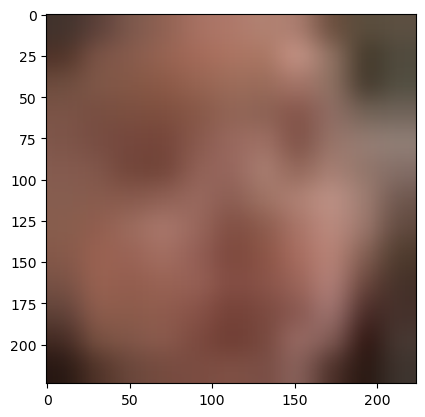

In [31]:
plt.imshow(X_test[91])

In [32]:

image = tf.expand_dims(X_test[658], axis=0)

In [33]:
predictions=model.predict(image)

1/1 [==============================] - 1s 1s/step


In [34]:
prediction = np.argmax(predictions)

if prediction == 1:
    print('Mask')
    
elif prediction  == 2:
    print('No mask')
    
elif prediction == 0:
    print('Not worn correctly')

No mask


In [35]:
no_mask = []
mask = []
nw = []

for idx, i in enumerate(y_test):
    
    if i == 2:
        image = tf.expand_dims(X_test[idx], axis=0)
        predictions=model.predict(image)
        prediction = np.argmax(predictions)

        if prediction == 1:
            print('Mask')
            mask.append(idx)
            
        elif prediction  == 2:
            print('No mask')
            no_mask.append(idx)
            
        elif prediction == 0:
            print('Not worn correctly')
            nw.append(idx)

1/1 [==============================] - 0s 54ms/step
No mask
1/1 [==============================] - 0s 66ms/step
No mask
1/1 [==============================] - 0s 68ms/step
No mask
1/1 [==============================] - 0s 57ms/step
Mask
1/1 [==============================] - 0s 60ms/step
No mask
1/1 [==============================] - 0s 60ms/step
No mask
1/1 [==============================] - 0s 52ms/step
No mask
1/1 [==============================] - 0s 55ms/step
No mask
1/1 [==============================] - 0s 53ms/step
No mask
1/1 [==============================] - 0s 60ms/step
No mask
1/1 [==============================] - 0s 64ms/step
No mask
1/1 [==============================] - 0s 61ms/step
No mask
1/1 [==============================] - 0s 55ms/step
No mask
1/1 [==============================] - 0s 49ms/step
No mask
1/1 [==============================] - 0s 57ms/step
No mask
1/1 [==============================] - 0s 68ms/step
Mask
1/1 [==============================] - 0s 59ms

No mask
1/1 [==============================] - 0s 47ms/step
No mask
1/1 [==============================] - 0s 50ms/step
No mask
1/1 [==============================] - 0s 50ms/step
No mask
1/1 [==============================] - 0s 54ms/step
No mask
1/1 [==============================] - 0s 55ms/step
No mask
1/1 [==============================] - 0s 52ms/step
No mask
1/1 [==============================] - 0s 53ms/step
No mask
1/1 [==============================] - 0s 53ms/step
No mask
1/1 [==============================] - 0s 49ms/step
Not worn correctly
1/1 [==============================] - 0s 48ms/step
No mask
1/1 [==============================] - 0s 47ms/step
No mask
1/1 [==============================] - 0s 56ms/step
No mask
1/1 [==============================] - 0s 56ms/step
No mask
1/1 [==============================] - 0s 60ms/step
No mask
1/1 [==============================] - 0s 67ms/step
No mask
1/1 [==============================] - 0s 49ms/step
No mask
1/1 [================

In [36]:
len(no_mask)

201

In [37]:
len(mask)

16